<H1>Sigmoid functions to model connections probabilities</H1>

<P>For modeling distance-dependent connection probabilities between inhibitory neurons</P>

In [1]:
%pylab inline
from scipy.optimize import curve_fit
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
# objective function
def sigmoid(x, A, C, r):
    """
    solves for the following 1igmoid function:
    f(x; A, C, r )=( A  / ( 1 + np.exp((x-C)/r)))
    
    where x is the independent variable
    A is the maximal amplitude of the curve
    C is the half point of the sigmoidal function
    r is rate of maximum population growth 
    """
    return  A  / ( 1 + np.exp((x-C)/r))

In [3]:
def fit_sigmoid(xdata, ydata, mytitle):
    """
    fit data to the sigmoid function, plots results and returns fitting parameters. 
    It will also save the 
    Arguments:
    ----------
    xdata: array
        independent variable
    ydata: array
        results of the function
    title: string
        the name of the figure and the dictionary object to be saved
    
    """
    
    # 1.- fit data
    pinit = [50, 150, 15] # initial guess for amplitude, half-width and slope
    lower_bounds = (0, 0, 15)
    upper_bounds = (100, 300, 100)
    mybounds = ((lower_bounds, upper_bounds))
    param, pcov = curve_fit(f=sigmoid, xdata= xval, ydata= yval, p0 = pinit, \
                        method='trf', bounds=mybounds)
    
    # 2.- plot data and fitting curve
    plt.plot(xdata, ydata, 'ko');
    plt.ylim(-10,110), plt.xlim(-5, 305);
    
    xfit = np.linspace(-5,305, 100)
    yfit = sigmoid(xfit, *param)
    plt.plot(xfit, yfit, color='brown')

    plt.xlabel('Intersomatic distance ($\mu$m)');
    plt.ylabel('Connection probability (%)');
    plt.title(mytitle)
    
    # 3.- return and save fitting results
    pickle.dump( param, open( mytitle+ ".p", 'wb' ) )
    
    print('A = {0[0]}, C = {0[1]} and r = {0[2]}'.format(param))
    

<H2>Chemical Synapses</H2>

A = 43.8162199613, C = 158.323406241 and r = 28.5954728217


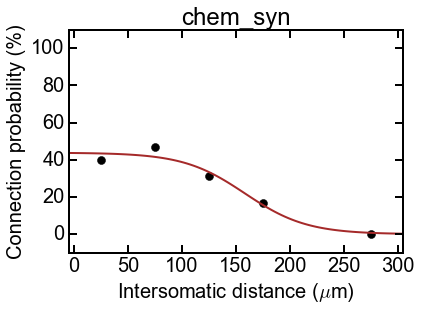

In [4]:
# Plot probabilities of inhibitory chemical synapses between inhibitory neurons
ichem_found  = np.array([10, 30, 29, 12, 2, 4], dtype=int)
ichem_tested = np.array([4,  14,  9,  2, 0, 0], dtype=float)

yval = (ichem_tested/ichem_found)*100
xval = arange(25,350,50) # bins
xval = array([ 25,  75, 125, 175,275, 325])
fit_sigmoid(xval, yval, 'chem_syn')

<H2>Electrical Synapses</H2>

A = 52.4318021242, C = 181.069903491 and r = 17.8865729775


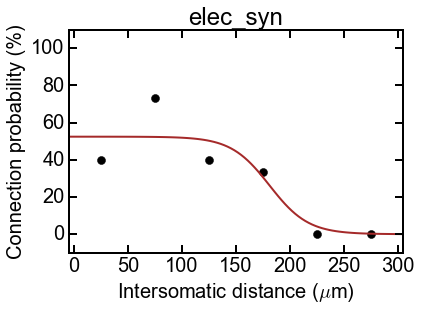

In [5]:
# Plot probabilities of inhibitory electrical synapses between inhibitory neurons
igap_found  = np.array([ 5, 15, 15, 6, 4, 1,  2], dtype=int)
igap_tested = np.array([ 2, 11,  6, 2, 0, 0,  0], dtype=float)

yval = (igap_tested/igap_found)*100
xval = arange(25,350,50) # bins

fit_sigmoid(xval, yval, 'elec_syn')